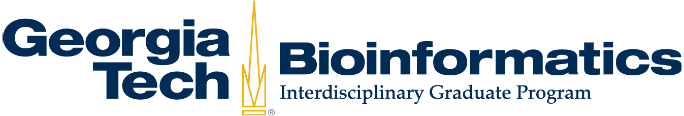

## Annotating variants in a VCF files

### BIOS 4150/BIOL 6150
#### Instructor: Dr. King Jordan
#### TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)


---

# **1. Downsampling 1000 Genomes VCF file**
### *50 points*


---

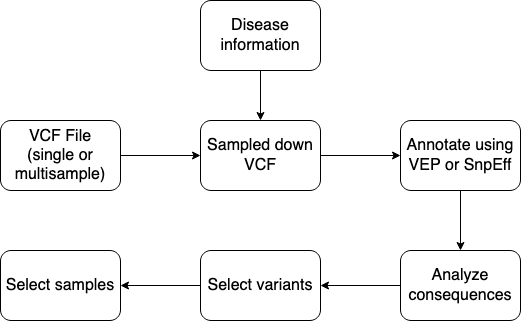

<div class="alert alert-block alert-warning">
    <h3>1.1 Check if you have VCF files required for today's class</h3>
    <p>We will be using Chr7 and Chr11 from 1000 genomes phase 3 for today's class</p>
</div>

In [1]:
!ls -lh ~/biol6150/Data/

!ls -lh ~/scratch/AnnotateVariants

total 4.5G
-rw-rwxrwx 1 ssharma454 gtperson  42K Sep 22 08:45 1000GenomesMap.tsv
-rw-rwxrwx 1 ssharma454 gtperson 2.0G Sep 15 07:08 1000Genomes.Pruned.vcf
-rw-rwxrwx 1 ssharma454 gtperson 736M Sep 22 06:43 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-rwxrwx 1 ssharma454 gtperson 123K Sep 22 07:14 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 949M Sep 28 17:05 phase3.chr5.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 167K Sep 28 17:08 phase3.chr5.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-rwxrwx 1 ssharma454 gtperson 868M Sep 22 07:04 phase3.chr7.GRCh38.GT.crossmap.vcf.gz
-rw-rwxrwx 1 ssharma454 gtperson 146K Sep 22 07:37 phase3.chr7.GRCh38.GT.crossmap.vcf.gz.tbi
total 99M
-rw-r--r-- 1 ssharma454 gtperson 1.1M Sep 22 08:20 1000Genomes.Chr11.HBB.Annotated.vcf
-rw-r--r-- 1 ssharma454 gtperson 1.1M Sep 22 07:34 1000Genomes.Chr11.HBB.vcf
-rw-r--r-- 1 ssharma454 gtperson 5.1M Sep 28 17:15 1000Genomes.Chr5.GM2A.vcf
-rw-r--r-- 1 ssharma454 gtperson  48M Sep 22 0

In [2]:
#Extract HBB gene
!bcftools view -r chr5:151253185-151270440 -Ov -o ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.vcf ~/biol6150/Data/phase3.chr5.GRCh38.GT.crossmap.vcf.gz


In [3]:
#Check the file.
!ls -lh ~/scratch/AnnotateVariants/

total 99M
-rw-r--r-- 1 ssharma454 gtperson 1.1M Sep 22 08:20 1000Genomes.Chr11.HBB.Annotated.vcf
-rw-r--r-- 1 ssharma454 gtperson 1.1M Sep 22 07:34 1000Genomes.Chr11.HBB.vcf
-rw-r--r-- 1 ssharma454 gtperson 5.1M Sep 28 23:07 1000Genomes.Chr5.GM2A.vcf
-rw-r--r-- 1 ssharma454 gtperson  48M Sep 22 08:24 1000Genomes.Chr7.CFTR.Annotated.vcf
-rw-r--r-- 1 ssharma454 gtperson  43M Sep 22 07:37 1000Genomes.Chr7.CFTR.vcf
-rw-r--r-- 1 ssharma454 gtperson 1.1K Sep 22 08:47 1000Genomes.SickleCellCarrierIDs.txt
-rw-r--r-- 1 ssharma454 gtperson 3.5K Sep 22 08:46 1000Genomes.SickleCellCarrierInfo.txt
-rw-r--r-- 1 ssharma454 gtperson 3.5K Sep 22 08:38 1000Genomes.SickleCellCarriers.txt
-rw-r--r-- 1 ssharma454 gtperson 1.4K Sep 22 08:04 snpEff_genes.txt
-rw-r--r-- 1 ssharma454 gtperson 229K Sep 22 08:04 snpEff_summary.html


In [4]:
#Check the file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.vcf | grep -v "##" | head | cut -f1-5,11-12

#CHROM	POS	ID	REF	ALT	HG00097	HG00099
chr5	151253186	rs553449209	C	G	0|0	0|0
chr5	151253215	rs572025687	C	A	0|0	0|0
chr5	151253224	rs545467021	C	T	0|0	0|0
chr5	151253229	rs557461469	A	T	0|0	0|0
chr5	151253249	rs143867953	C	T	0|0	0|0
chr5	151253250	rs543252624	G	T	0|0	0|0
chr5	151253271	rs1048719	G	A	0|0	0|0
chr5	151253279	rs529126687	G	T	0|0	0|0
chr5	151253294	rs28365994	A	T	0|0	0|0
grep: write error
cat: write error: Broken pipe


## **2. Annotating a VCF file**
### *150 points*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Check if you can use snpEff</h3>
    <p>We will be using snpEff for variant annotation and effect prediction. VEP <i>https://useast.ensembl.org/info/docs/tools/vep/index.html</i> is another popular choice for similar tasks and provides a command line (not an easy install) and web based interface</p>
</div>

### Check documentation for snpEff here: http://pcingola.github.io/SnpEff/snpeff/introduction/

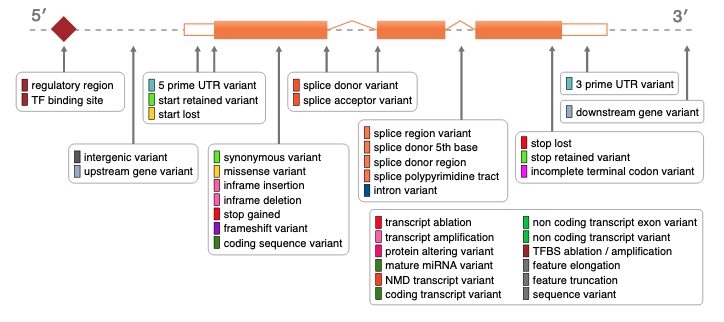

<div class="alert alert-block alert-warning">
    <h3>2.2 Tay-Sachs disease</h3>
    <p>Typically found in people with certain ancestry, such as Eastern European Jews</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>2.2 Annotate GM2A gene</h3>
    <p>We will be using snpEff for variant annotation and effect prediction. VEP <i>https://useast.ensembl.org/info/docs/tools/vep/index.html</i> is another popular choice for similar tasks and provides a command line (not an easy install) and web based interface</p>
</div>

In [13]:
#Run the snpEff commad
!snpEff -Xmx16g ann -v GRCh38.105 ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.vcf > ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.vcf



00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'ann'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'GRCh38.105'
00:00:00 Reading config file: /home/hice1/ssharma454/notebooks/snpEff.config
00:00:00 Reading config file: /storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/snpEff.config
00:00:01 done
00:00:01 Reading database for genome version 'GRCh38.105' from file '/storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/./data/GRCh38.105/snpEffectPredictor.bin' (this might take a while)
00:00:29 done
00:00:29 Loading Motifs and PWMs
00:00:29 Building interval forest
00:00:42 done.
00:00:42 Genome stats :
#-----------------------------------------------
# Genome name                : 'Homo_sapiens'
# Genome version             : 'GRCh38.105'
# Genome ID                  : 'GRCh38.105[0]'
# Has protein coding info    : true
# Has Tr. Support Level info : true
# Genes              

00:00:49 Loading sequences for chromosome '5' from file '/storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/./data/GRCh38.105/sequence.5.bin'
00:00:51 Building sequence tree for chromosome '5'
00:00:51 Done. Loaded 1617 sequences.

WARNINGS: Some warning were detected
Warning type	Number of warnings
INFO_REALIGN_3_PRIME	13
WARNING_TRANSCRIPT_NO_START_CODON	420
WARNING_TRANSCRIPT_NO_START_CODON&INFO_REALIGN_3_PRIME	5
WARNING_TRANSCRIPT_NO_STOP_CODON	479
WARNING_TRANSCRIPT_NO_STOP_CODON&INFO_REALIGN_3_PRIME	7


00:00:53 Creating summary file: snpEff_summary.html
00:00:53 Creating genes file: snpEff_genes.txt
00:00:53 done.
00:00:53 Logging
00:00:54 Checking for updates...
00:00:55 Done.


In [21]:
#Check the output file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.vcf | grep -v "##" | grep "protein_coding" | cut -f1-12

chr5	151253186	rs553449209	C	G	100.0	PASS	AC=1;AF=0.000199681;AN=5008;NS=2504;DP=15474;EAS_AF=0;AMR_AF=0;AFR_AF=0.0008;EUR_AF=0;SAS_AF=0;AA=C|||;VT=SNP;ANN=G|5_prime_UTR_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000357164.4|protein_coding|1/4|c.-31C>G|||||31|,G|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000523466.5|protein_coding|2/3|c.127-6569C>G||||||WARNING_TRANSCRIPT_NO_STOP_CODON	GT	0|0	0|0	0|0
chr5	151253215	rs572025687	C	A	100.0	PASS	AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16033;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0;SAS_AF=0.001;AA=C|||;VT=SNP;EX_TARGET;ANN=A|5_prime_UTR_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000357164.4|protein_coding|1/4|c.-2C>A|||||2|,A|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000523466.5|protein_coding|2/3|c.127-6540C>A||||||WARNING_TRANSCRIPT_NO_STOP_CODON	GT	0|0	0|0	0|0
chr5	151253224	rs545467021	C	T	100.0	PASS	AC=1;AF=0.000199681;AN=5008;NS=2504;DP=16211;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0;

chr5	151264750	rs190807148	C	T	100.0	PASS	AC=3;AF=0.000599042;AN=5008;NS=2504;DP=19837;EAS_AF=0.002;AMR_AF=0;AFR_AF=0;EUR_AF=0;SAS_AF=0.001;AA=C|||;VT=SNP;ANN=T|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000357164.4|protein_coding|2/3|c.244-1981C>T||||||,T|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000523004.1|protein_coding|1/1|c.118-1981C>T||||||WARNING_TRANSCRIPT_NO_START_CODON,T|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000523466.5|protein_coding|3/3|c.289-1981C>T||||||WARNING_TRANSCRIPT_NO_STOP_CODON	GT	0|0	0|0	0|0
chr5	151264751	rs562514175	G	A	100.0	PASS	AC=2;AF=0.000399361;AN=5008;NS=2504;DP=19631;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0.001;SAS_AF=0.001;AA=G|||;VT=SNP;ANN=A|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000357164.4|protein_coding|2/3|c.244-1980G>A||||||,A|intron_variant|MODIFIER|GM2A|ENSG00000196743|transcript|ENST00000523004.1|protein_coding|1/1|c.118-1980G>A||||||WARNING_TRANSCRIPT_NO_START_

<div class="alert alert-block alert-warning">
    <h3>2.3 Process the annotations</h3>
    <p>We will see which variants have a potential consequence based on functional product they translate.</p>
</div>

### Check out the SnpEff documentations about how annotations work here: http://pcingola.github.io/SnpEff/adds/VCFannotationformat_v1.0.pdf

In [26]:
#Check the output file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.vcf | grep -v "##" | cut -f1-5,8 > ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotations.tsv 

<div class="alert alert-block alert-danger">
    <h3>2.4 Switch to python</h3>
    <p>We will use Python to read and process the annotations added to the VCF file</p>
</div>

In [52]:
#Read the annotations file.
with open("/home/hice1/ssharma454/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotations.tsv", "r") as f:
    file_text = f.read()
    
annotation_rows = [i.split("\t") for i in file_text.split("\n") if i != ""]
len(annotation_rows)

487

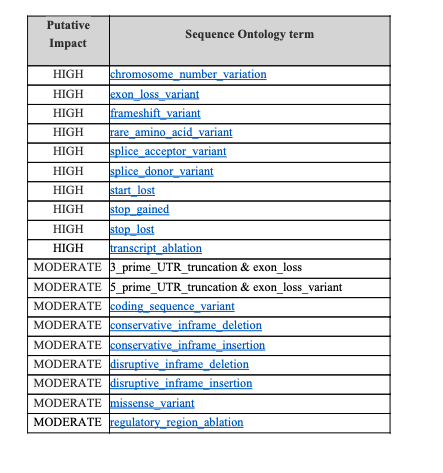

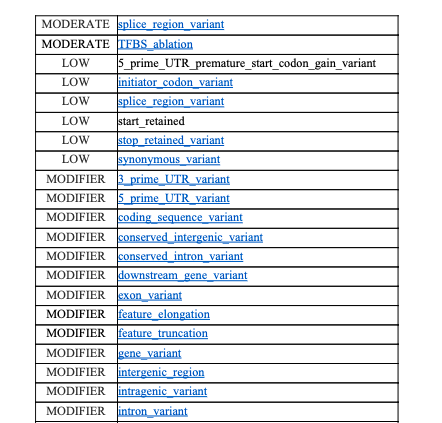

In [53]:
#Just get the annotations and don't mess the index later.
annotations = [i[5] for i in annotation_rows[1:]]

#Split the annotations by ","
annotations = [i.split(",") for i in annotations]

#Filter only annotations which have "ENST00000357164.4" in them.
annotations = [[transcript_annotation] for annotation in annotations for transcript_annotation in annotation 
                 if "ENST00000357164.4" in transcript_annotation]

#Next, let's filter for "HIGH" or "MODERATE" level variants. We define Significant accordinly.
annotations = [annotation + ["Significant"] if ("MODERATE" in annotation[0] or "HIGH" in annotation[0])else 
                 annotation + ["NotSignificant"] for annotation in annotations]



In [54]:
#Get the indices where variants if found to be significant.
significant_annotations_indices = [idx+1 for idx, annotation in enumerate(annotations) if annotation[1] == "Significant"]

In [55]:
significant_annotations_indices

[3, 4, 6, 7, 9, 198, 199, 200, 392, 393, 394, 395]

In [62]:
#Get the significant rows.
significant_annotation_rows = [i for idx, i in enumerate(annotation_rows) if idx in significant_annotations_indices]
significant_annotations_dbSNP = [i[2] for i in significant_annotation_rows]

#With more info.
significant_annotations_dbSNP_info = [i[1] for i in significant_annotation_rows]

In [63]:
print(significant_annotations_dbSNP)

significant_annotations_dbSNP_info

['rs545467021', 'rs557461469', 'rs543252624', 'rs1048719', 'rs28365994', 'rs153477', 'rs201829650', 'rs153478', 'rs61740602', 'rs564534389', 'rs532003642', 'rs199774853']


['151253224',
 '151253229',
 '151253250',
 '151253271',
 '151253294',
 '151259848',
 '151259851',
 '151259878',
 '151267327',
 '151267372',
 '151267386',
 '151267420']

In [17]:
#Write them to a file.
with open("/home/hice1/ssharma454/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.SignificantAnnotations.txt", "w") as f:
    for i in significant_annotations_dbSNP:
        f.write(i + "\n")
              

<div class="alert alert-block alert-warning">
    <h3>2.5 Are any of these variants documented as pathogenic?</h3>
    <p>We now have individuals who have at least one copy of a MODERATE or higher impact.</p>
</div>

In [2]:
!head ~/biol6150/Data/variant_summary.txt -n5

#AlleleID	Type	Name	GeneID	GeneSymbol	HGNC_ID	ClinicalSignificance	ClinSigSimple	LastEvaluated	RS# (dbSNP)	nsv/esv (dbVar)	RCVaccession	PhenotypeIDS	PhenotypeList	Origin	OriginSimple	Assembly	ChromosomeAccession	Chromosome	Start	Stop	ReferenceAllele	AlternateAllele	Cytogenetic	ReviewStatus	NumberSubmitters	Guidelines	TestedInGTR	OtherIDs	SubmitterCategories	VariationID	PositionVCF	ReferenceAlleleVCF	AlternateAlleleVCF
15041	Indel	NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTAACTGTAAA (p.Arg27_Ile28delinsLeuLeuTer)	9907	AP5Z1	HGNC:22197	Pathogenic	1	-	397704705	-	RCV000000012	MONDO:MONDO:0013342,MedGen:C3150901,OMIM:613647,Orphanet:306511	Hereditary spastic paraplegia 48	germline;unknown	germline	GRCh37	NC_000007.13	7	4820844	4820847	na	na	7p22.1	criteria provided, single submitter	2	-	N	ClinGen:CA215070,OMIM:613653.0001	3	2	4820844	GGAT	TGCTGTAAACTGTAACTGTAAA
15041	Indel	NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTAACTGTAAA (p.Arg27_Ile28delinsLeuLeuTer)	9907	AP5Z1	HGNC:22197	Pathogen

<div class="alert alert-block alert-warning">
    <h3>2.6 Oops!</h3>
    <p>For obvious reasons, ClinVar connects their intries using RefSeq IDs. But we have ENST IDs.</p>
</div>

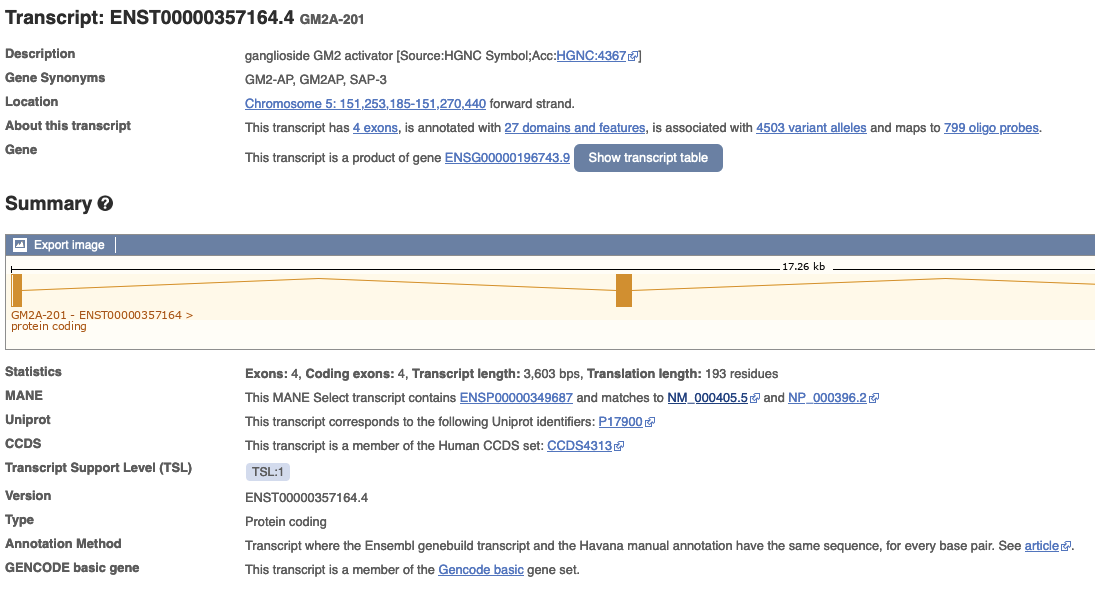

In [3]:
#Look for variants by poisitions within the transcript of interest 
!cat ~/biol6150/Data/variant_summary.txt | grep "NM_000405" | cut -f1-5,7,19-21 | grep -E "151253224|151253229|151253250|151253271|151253294|151259848|151259851|151259878|151267327|151267372|151267386|151267420"



176964	single nucleotide variant	NM_000405.5(GM2A):c.175A>G (p.Ile59Val)	2760	GM2A	Benign	5	151259848	151259848
177227	single nucleotide variant	NM_000405.5(GM2A):c.205A>G (p.Met69Val)	2760	GM2A	Benign	5	151259878	151259878
251827	single nucleotide variant	NM_000405.5(GM2A):c.55G>A (p.Ala19Thr)	2760	GM2A	Benign	5	151253271	151253271
296457	single nucleotide variant	NM_000405.5(GM2A):c.78A>T (p.Lys26Asn)	2760	GM2A	Likely benign	5	151253294	151253294
298353	single nucleotide variant	NM_000405.5(GM2A):c.458T>C (p.Val153Ala)	2760	GM2A	Benign	5	151267327	151267327
893612	single nucleotide variant	NM_000405.5(GM2A):c.13A>T (p.Met5Leu)	2760	GM2A	Uncertain significance	5	151253229	151253229
893614	single nucleotide variant	NM_000405.5(GM2A):c.517G>A (p.Val173Ile)	2760	GM2A	Uncertain significance	5	151267386	151267386
1379499	single nucleotide variant	NM_000405.5(GM2A):c.178G>A (p.Val60Ile)	2760	GM2A	Uncertain significance	5	151259851	151259851
1515612	single nucleotide variant	NM_000405.5(GM2A

<div class="alert alert-block alert-warning">
    <h3>2.7 Look at which individuals carry the above found MODERATE or higher impact variants</h3>
    <p>We'll write a bcftools query</p>
</div>

In [19]:
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.SignificantAnnotations.txt

rs545467021
rs557461469
rs543252624
rs1048719
rs28365994
rs153477
rs201829650
rs153478
rs61740602
rs564534389
rs532003642
rs199774853


In [32]:
#Write the significant annotations in a new VCF file.
!cat ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.vcf | grep "#" > ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.Significant.vcf
!grep -f ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.SignificantAnnotations.txt ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.vcf >> ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.Significant.vcf



In [4]:
#Query command using bcftools.
!bcftools query -f'[%CHROM %POS %ID %SAMPLE %GT\n]' -i 'ID="rs201829650" && GT="alt"' ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.Significant.vcf 


chr5 151259851 rs201829650 HG03057 1|0
chr5 151259851 rs201829650 NA19041 1|0
chr5 151259851 rs201829650 NA19314 1|0


In [5]:
#Query command using bcftools.
!bcftools query -f'[%CHROM %POS %ID %SAMPLE %GT\n]' -i 'GT="alt"' ~/scratch/AnnotateVariants/1000Genomes.Chr5.GM2A.Annotated.Significant.vcf 

chr5 151253224 rs545467021 NA20910 0|1
chr5 151253229 rs557461469 HG01864 1|0
chr5 151253250 rs543252624 HG01810 0|1
chr5 151253271 rs1048719 HG00173 0|1
chr5 151253271 rs1048719 HG00181 1|0
chr5 151253271 rs1048719 HG00254 0|1
chr5 151253271 rs1048719 HG00260 0|1
chr5 151253271 rs1048719 HG00267 0|1
chr5 151253271 rs1048719 HG00350 0|1
chr5 151253271 rs1048719 HG00381 1|0
chr5 151253271 rs1048719 HG00403 0|1
chr5 151253271 rs1048719 HG00407 1|0
chr5 151253271 rs1048719 HG00419 0|1
chr5 151253271 rs1048719 HG00436 1|1
chr5 151253271 rs1048719 HG00443 1|0
chr5 151253271 rs1048719 HG00445 1|0
chr5 151253271 rs1048719 HG00458 0|1
chr5 151253271 rs1048719 HG00463 0|1
chr5 151253271 rs1048719 HG00475 1|0
chr5 151253271 rs1048719 HG00478 0|1
chr5 151253271 rs1048719 HG00513 0|1
chr5 151253271 rs1048719 HG00524 1|0
chr5 151253271 rs1048719 HG00531 0|1
chr5 151253271 rs1048719 HG00534 0|1
chr5 151253271 rs1048719 HG00543 0|1
chr5 151253271 rs1048719 HG00556 1|1
chr5 151253271 rs1048719 HG00557